In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
from plotnine import *
import seaborn as sns
from enhance_ocod.analysis import create_time_series_by_groups, create_mean_difference_by_groups
path = '../data/processed_price_paid/price_paid_2024.parquet'
ONSPD_path = "../data/ocod_history_processed/OCOD_FULL_2017_03.parquet"
figures_folder = Path('../figures/figures_new')

figures_folder.mkdir(parents=True, exist_ok=True)

active_ocod_path = '../data/ocod_history_processed_new'

active_class_var = 'class'


# Get MSOA dwelling counts from 2021 census

https://statistics.ukdataservice.ac.uk/dataset/england-and-wales-census-2021-rm205-dwelling-type/resource/f7cde7e0-5c9b-4091-bfb6-b34db820f30e

In [2]:
msoa_dwelling = pd.read_excel('https://ukds-ckan.s3.eu-west-1.amazonaws.com/2021/ONS/dwelling-type/RM205-Dwelling-Type-2021-msoa-ONS.xlsx',
).rename(columns = {'Middle layer Super Output Areas Code':'msoa11cd', 'Observation':'dwellings'})
msoa_dwelling = msoa_dwelling.groupby('msoa11cd')['dwellings'].sum().reset_index()

<Axes: xlabel='dwellings', ylabel='Count'>

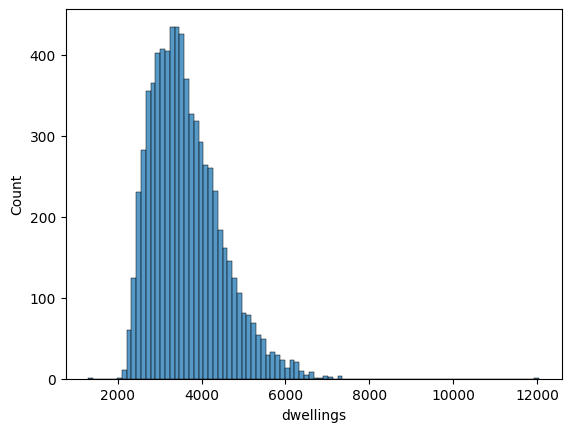

In [3]:
sns.histplot(msoa_dwelling, x = 'dwellings')

In [4]:
test = pd.read_parquet('/teamspace/studios/this_studio/enhance_ocod/data/ocod_history_processed_any_non_match/OCOD_FULL_2024_07.parquet')

## Overall figures

THe below shows the total value of all residential property as well as the total residential value

In [5]:
overall_figures = create_time_series_by_groups(msoa_dwellings = msoa_dwelling, grouping_vars=None, 
ocod_path = active_ocod_path,
class_var = active_class_var)

100%|██████████| 99/99 [00:38<00:00,  2.57it/s]


## Region figures

THe below shows the total value of all residential property as well as the total residential value

In [6]:

df_msoa_region = create_time_series_by_groups(msoa_dwellings = msoa_dwelling, grouping_vars= ['region'], 
ocod_path = active_ocod_path,
class_var = active_class_var)


100%|██████████| 99/99 [00:44<00:00,  2.21it/s]


In [7]:
fract_total = df_msoa_region[['total_value_ocod_mean', 'region']].groupby('region').mean()

print(fract_total)

(fract_total /fract_total['total_value_ocod_mean'].sum()).round(2)*100

                  total_value_ocod_mean
region                                 
EAST ANGLIA                6.701231e+08
EAST MIDLANDS              6.021468e+08
GREATER LONDON             4.926203e+10
NORTH                      4.813953e+08
NORTH WEST                 2.464524e+09
SOUTH EAST                 5.197549e+09
SOUTH WEST                 1.227404e+09
WALES                      4.123174e+08
WEST MIDLANDS              8.458762e+08
YORKS AND HUMBER           1.081697e+09


,total_value_ocod_mean
region,
EAST ANGLIA,1.0
EAST MIDLANDS,1.0
GREATER LONDON,79.0
NORTH,1.0
NORTH WEST,4.0
SOUTH EAST,8.0
SOUTH WEST,2.0
WALES,1.0
WEST MIDLANDS,1.0


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/figures_new/relative_value_excluding_london.png


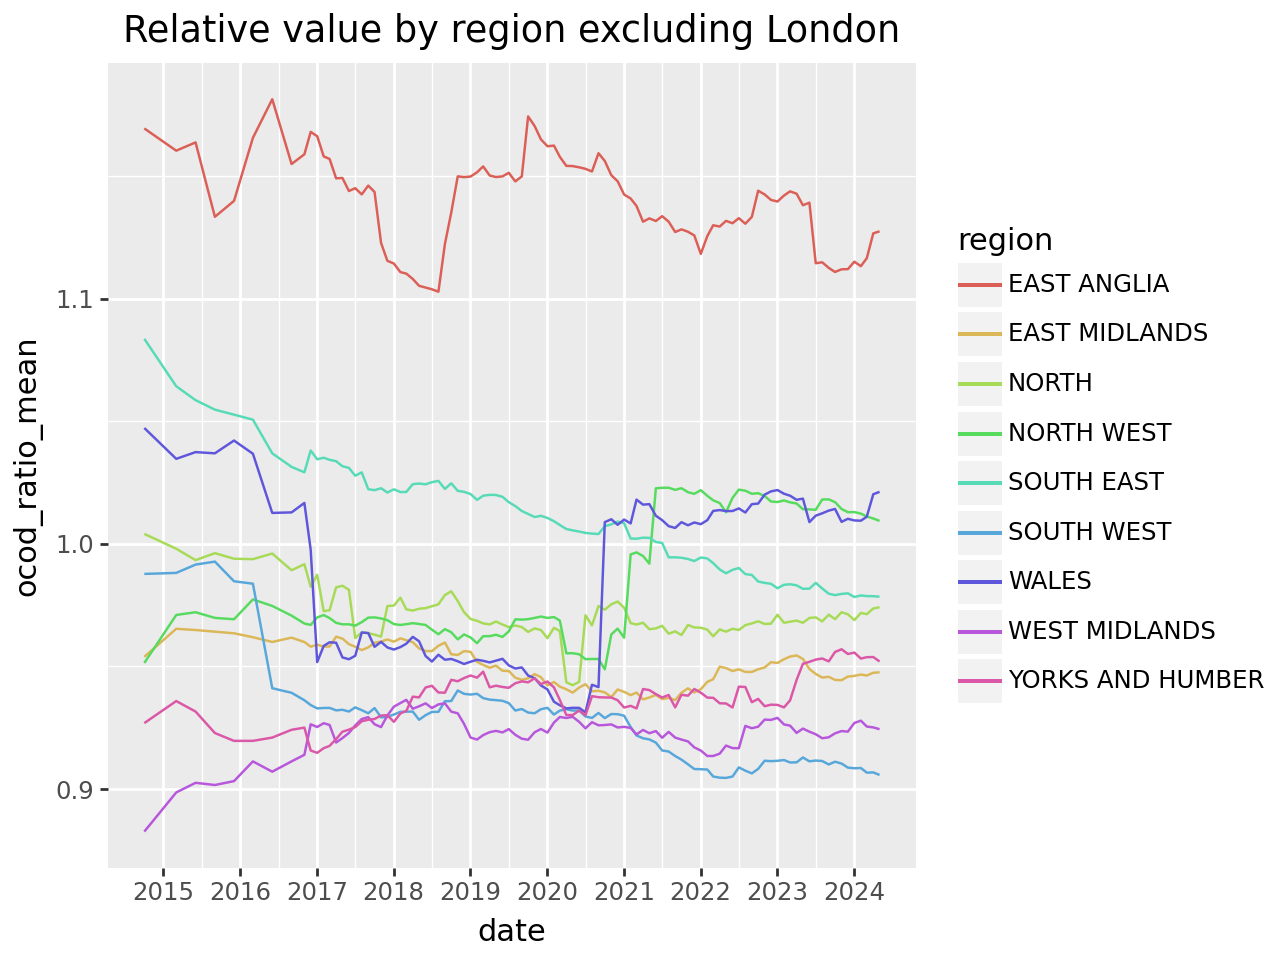

In [8]:
p = ggplot(df_msoa_region.loc[df_msoa_region['region']!='GREATER LONDON'], aes(x = 'date', y = 'ocod_ratio_mean', color = 'region')) + geom_line() + labs(
    title = "Relative value by region excluding London") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )

p.save(filename = figures_folder / 'relative_value_excluding_london.png')

p

In [9]:
df_msoa_region

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,region
0,2015-10-01,2015,10,261916,228513,223983,198824,1.169358,1240,722531,324776382,161834675004,0.002007,EAST ANGLIA
1,2015-10-01,2015,10,158121,143531,165759,148584,0.953921,2477,1332775,391666650,220919956095,0.001773,EAST MIDLANDS
2,2015-10-01,2015,10,1242960,887621,526249,434129,2.361922,34624,3155328,43036277371,1660490507479,0.025918,GREATER LONDON
3,2015-10-01,2015,10,147607,135257,147012,132100,1.004047,4261,977537,628957352,143710611871,0.004377,NORTH
4,2015-10-01,2015,10,141473,127645,148698,132992,0.951416,9586,2359484,1356167411,350850873084,0.003865,NORTH WEST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2025-05-01,2025,5,455615,405640,465654,415713,0.978442,14799,3679252,6742659719,1713259670770,0.003936,SOUTH EAST
986,2025-05-01,2025,5,341761,304407,377318,334359,0.905764,4576,1607056,1563900224,606371464404,0.002579,SOUTH WEST
987,2025-05-01,2025,5,247546,228981,242408,218636,1.021193,2284,761519,565395466,184598975602,0.003063,WALES
988,2025-05-01,2025,5,261961,237119,283381,257246,0.924413,3976,1362473,1041558268,386099520197,0.002698,WEST MIDLANDS


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/figures_new/relative_value_region.png


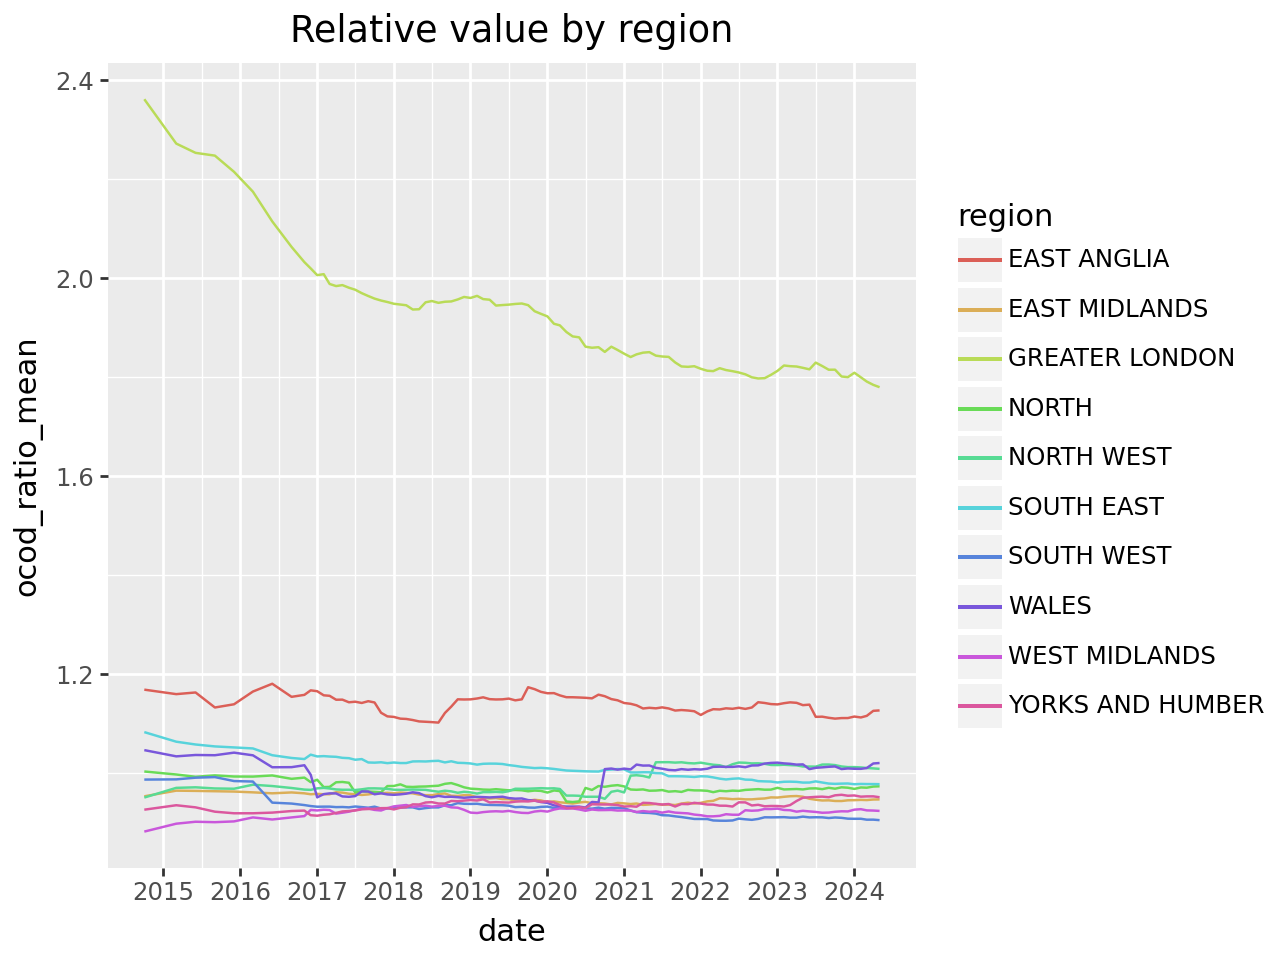

In [10]:
p = ggplot(df_msoa_region, aes(x = 'date', y = 'ocod_ratio_mean', color = 'region')) + geom_line() + labs(
    title = "Relative value by region") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )


p.save(filename = figures_folder / 'relative_value_region.png')

p

In [11]:
df_msoa_nested = create_time_series_by_groups(msoa_dwellings = msoa_dwelling, grouping_vars= ['is_multi'],
ocod_path = active_ocod_path,
class_var = active_class_var)

100%|██████████| 99/99 [00:44<00:00,  2.24it/s]


In [12]:
df_msoa_nested

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,is_multi
0,2015-10-01,2015,10,795642,577532,267000,231189,2.979925,49072,18271772,39043751907,4878576237619,0.008003,False
1,2015-10-01,2015,10,424219,336798,342236,275890,1.239550,30142,3087352,12786816348,1056604574295,0.012102,True
2,2016-03-01,2016,3,824415,601768,275475,239212,2.992696,48253,18051377,39780509605,4972717496129,0.008000,False
3,2016-03-01,2016,3,441647,353503,356203,288719,1.239874,33897,3278521,14970511771,1167819651833,0.012819,True
4,2016-06-01,2016,6,836111,612942,281026,244387,2.975206,48109,17863925,40224467798,5020231847513,0.008012,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2025-03-01,2025,3,527175,436144,465591,387497,1.132272,48780,4515480,25715639616,2102367857787,0.012232,True
194,2025-04-01,2025,4,979735,692681,406476,354429,2.410311,41196,15857852,40361180393,6445847268239,0.006262,False
195,2025-04-01,2025,4,526491,436097,465595,387747,1.130792,48928,4523925,25760196491,2106320975583,0.012230,True
196,2025-05-01,2025,5,976727,692964,406854,354966,2.400680,41184,15844916,40225554188,6446577417982,0.006240,False


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/figures_new/relative_value_nested.png


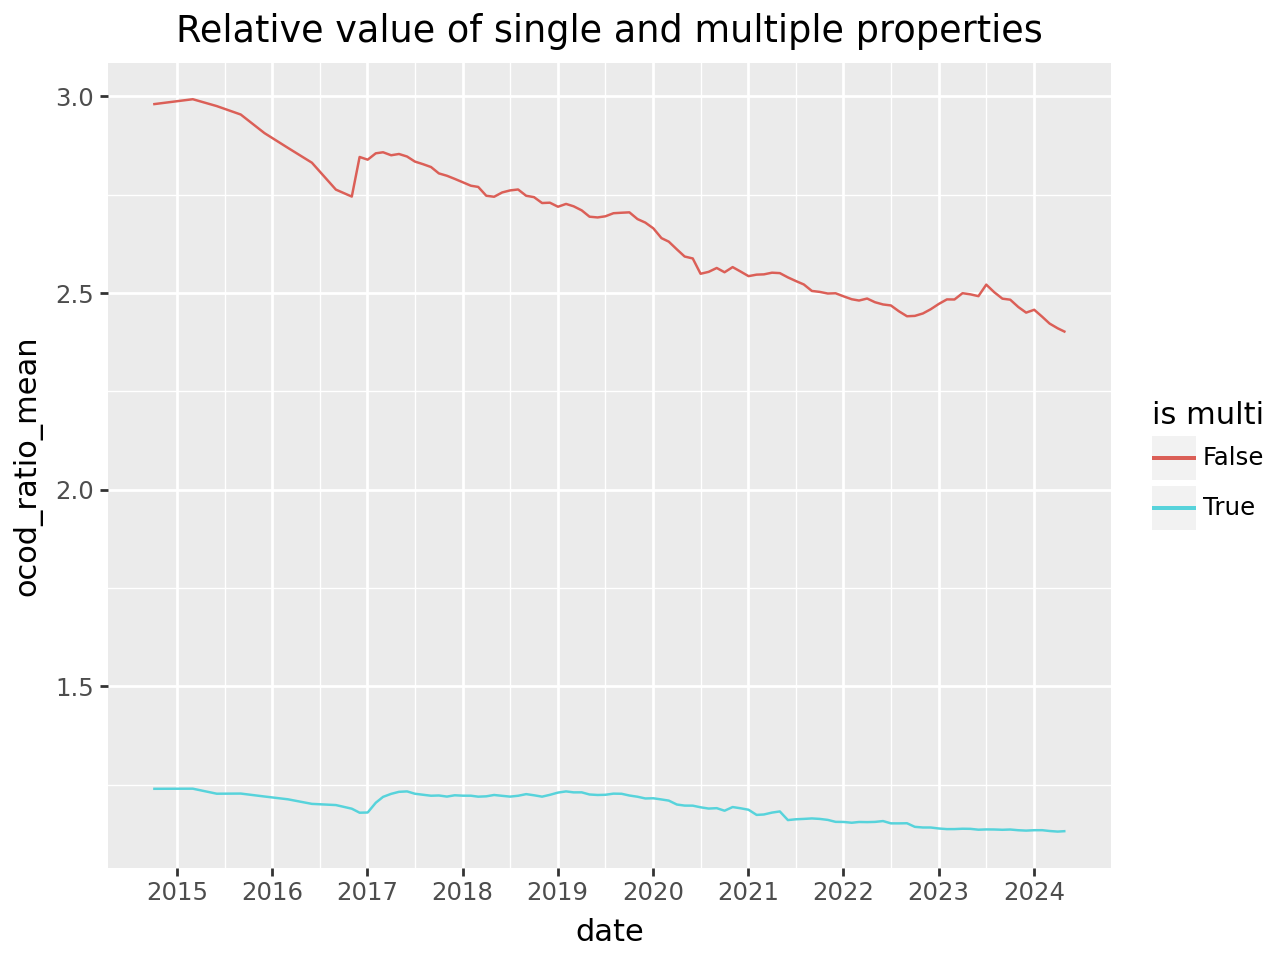

In [13]:
p = ggplot(df_msoa_nested, aes(x = 'date', y = 'ocod_ratio_mean', color = 'is_multi')) + geom_line() + labs(
    title = "Relative value of single and multiple properties",
    color = 'is multi') +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_nested['date'].min(), end=df_msoa_nested['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )

p.save(filename = figures_folder / 'relative_value_nested.png')

p

In [14]:
df_msoa_nested

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,is_multi
0,2015-10-01,2015,10,795642,577532,267000,231189,2.979925,49072,18271772,39043751907,4878576237619,0.008003,False
1,2015-10-01,2015,10,424219,336798,342236,275890,1.239550,30142,3087352,12786816348,1056604574295,0.012102,True
2,2016-03-01,2016,3,824415,601768,275475,239212,2.992696,48253,18051377,39780509605,4972717496129,0.008000,False
3,2016-03-01,2016,3,441647,353503,356203,288719,1.239874,33897,3278521,14970511771,1167819651833,0.012819,True
4,2016-06-01,2016,6,836111,612942,281026,244387,2.975206,48109,17863925,40224467798,5020231847513,0.008012,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2025-03-01,2025,3,527175,436144,465591,387497,1.132272,48780,4515480,25715639616,2102367857787,0.012232,True
194,2025-04-01,2025,4,979735,692681,406476,354429,2.410311,41196,15857852,40361180393,6445847268239,0.006262,False
195,2025-04-01,2025,4,526491,436097,465595,387747,1.130792,48928,4523925,25760196491,2106320975583,0.012230,True
196,2025-05-01,2025,5,976727,692964,406854,354966,2.400680,41184,15844916,40225554188,6446577417982,0.006240,False


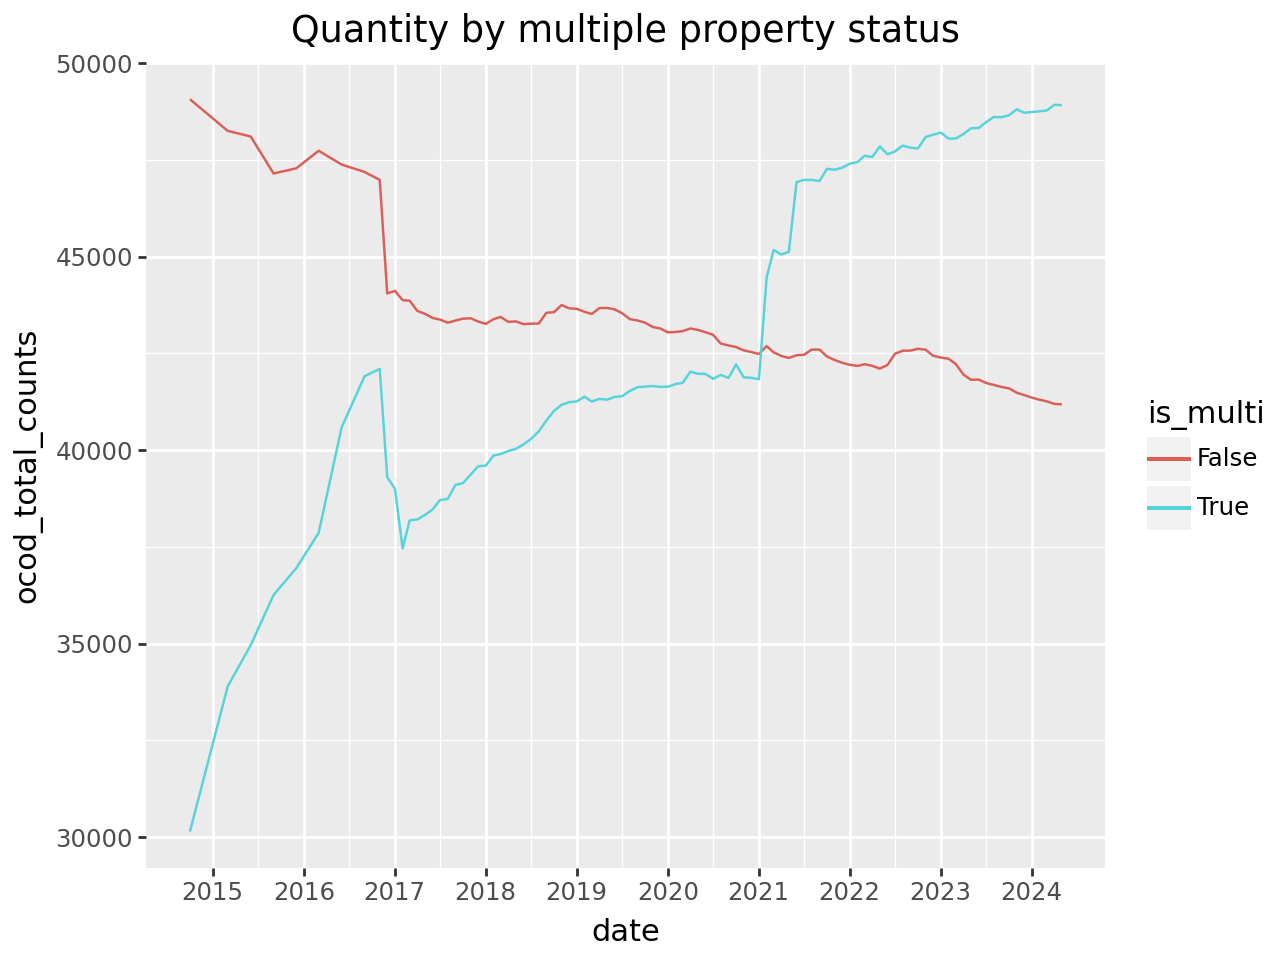

In [15]:
p = ggplot(df_msoa_nested, aes(x = 'date', y = 'ocod_total_counts', color = 'is_multi')) + geom_line() + labs(
    title = "Quantity by multiple property status") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region['date'].min(), end=df_msoa_region['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 )

p

# Country of Incorporation
 

In [16]:
df_msoa_incorporated = create_time_series_by_groups( msoa_dwellings = msoa_dwelling, 
grouping_vars=  ['country_incorporated'], 
ocod_path = '../data/ocod_history_processed',
class_var = 'class2')

100%|██████████| 99/99 [01:17<00:00,  1.28it/s]


In [17]:
df_msoa_incorporated.to_csv(figures_folder / 'country.csv')

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/figures_new/relative_value_incorporation.png


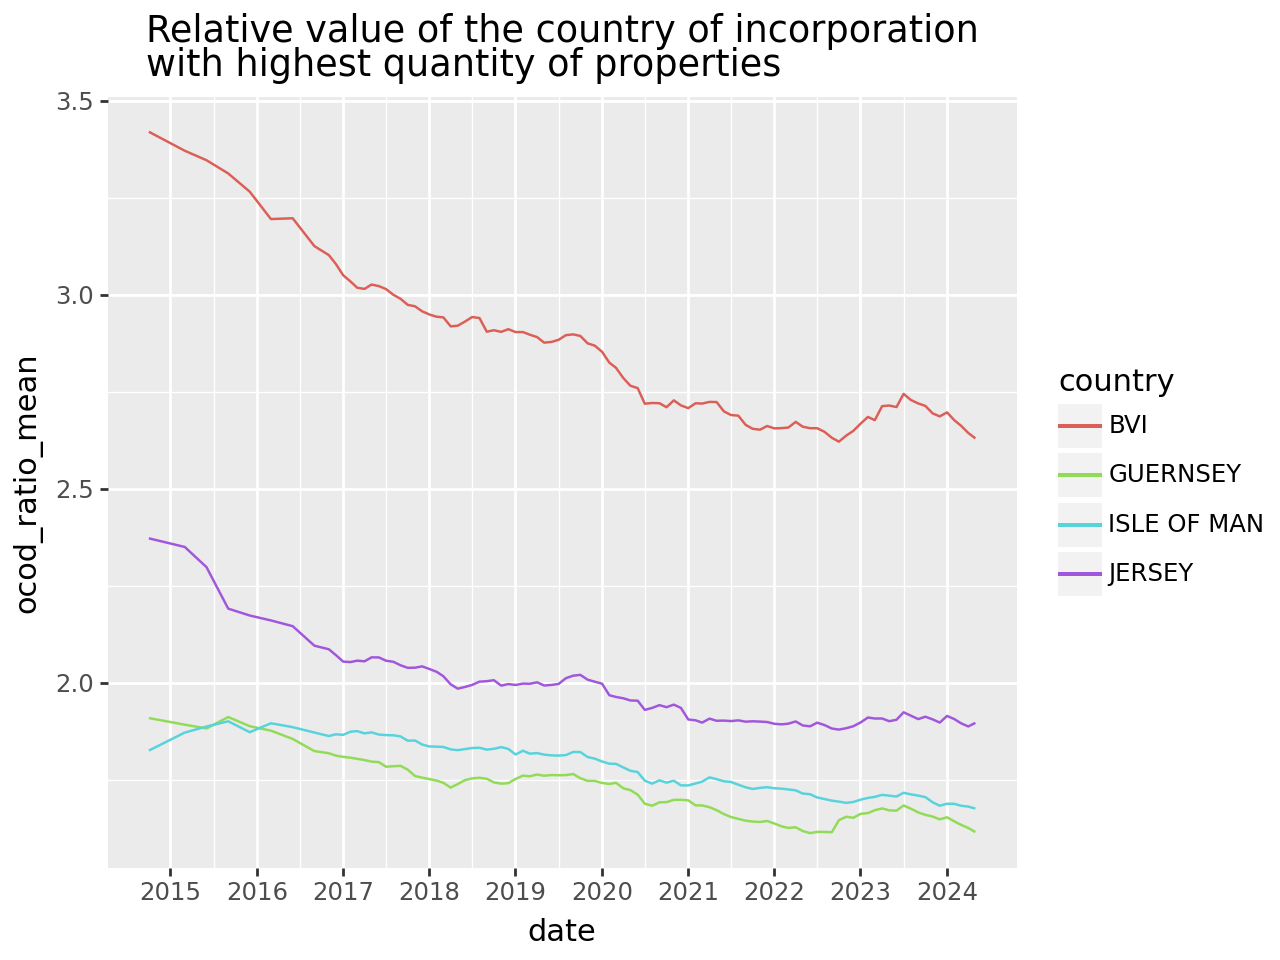

In [18]:
df_msoa_incorporated['country_incorporated'] = df_msoa_incorporated['country_incorporated'].str.replace("BRITISH VIRGIN ISLANDS", "BVI")

p =  ggplot(df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin(['JERSEY', 'GUERNSEY', 
'ISLE OF MAN', 'BRITISH VIRGIN ISLANDS', 'BVI'])], 
aes(x = 'date', y = 'ocod_ratio_mean', color = 'country_incorporated')) + geom_line() + labs(
    title = "Relative value of the country of incorporation\nwith highest quantity of properties") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_incorporated['date'].min(), end=df_msoa_incorporated['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 ) + \
  guides(color = guide_legend(title = "country")) 

p.save(filename = figures_folder / 'relative_value_incorporation.png')

p

In [19]:
df_msoa_incorporated

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,country_incorporated
0,2015-10-01,2015,10,122117,112500,122117.0,112500.0,1.000000,4,4941,488469,6.033814e+08,0.000810,00002065
1,2015-10-01,2015,10,111820,100000,111820.0,100000.0,1.000000,1,4349,111820,4.863088e+08,0.000230,0003280
2,2015-10-01,2015,10,161230,140000,161230.0,140000.0,1.000000,1,5516,161230,8.893452e+08,0.000181,085544C
3,2015-10-01,2015,10,434115,354300,434115.0,354300.0,1.000000,2,4166,868231,1.808526e+09,0.000480,1005646
4,2015-10-01,2015,10,516244,439975,516244.0,439975.0,1.000000,1,6488,516244,3.349392e+09,0.000154,1012258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19612,2025-05-01,2025,5,511530,445185,519692.0,447205.0,0.984294,8,20092,4092240,1.044166e+10,0.000392,"WASHINGTON, U.S.A."
19613,2025-05-01,2025,5,3213261,1501000,3213261.0,1501000.0,1.000000,2,3806,6426522,1.222967e+10,0.000525,WESTERN SAMOA
19614,2025-05-01,2025,5,280000,237583,271639.0,226850.0,1.030778,3,12828,840000,3.484592e+09,0.000241,"WISCONSIN, U.S.A."
19615,2025-05-01,2025,5,1269905,893861,1272719.0,842900.0,0.997789,18,44906,22858299,5.715273e+10,0.000400,"WYOMING, U.S.A."


In [20]:
df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin(['BVI', 'JERSEY', 'GUERNSEY', 'ISLO OF MAN']),
'ocod_total_counts':]

,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,country_incorporated
52,21052,9275375,24114955272,3.107058e+12,0.007761,BVI
88,10494,8031482,6449650071,2.586548e+12,0.002494,GUERNSEY
112,14671,11989840,9671866230,3.332810e+12,0.002902,JERSEY
268,21206,9297365,24684066037,3.210709e+12,0.007688,BVI
305,10788,8260338,6708633510,2.715956e+12,0.002470,GUERNSEY
...,...,...,...,...,...,...
19297,12292,9198714,8822687626,4.063041e+12,0.002171,GUERNSEY
19315,15440,10688149,12282698959,4.506460e+12,0.002726,JERSEY
19452,18390,7313882,24552579791,3.713770e+12,0.006611,BVI
19487,12240,9201632,8726226299,4.063262e+12,0.002148,GUERNSEY


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/figures_new/relative_value_incorporation_increases.png


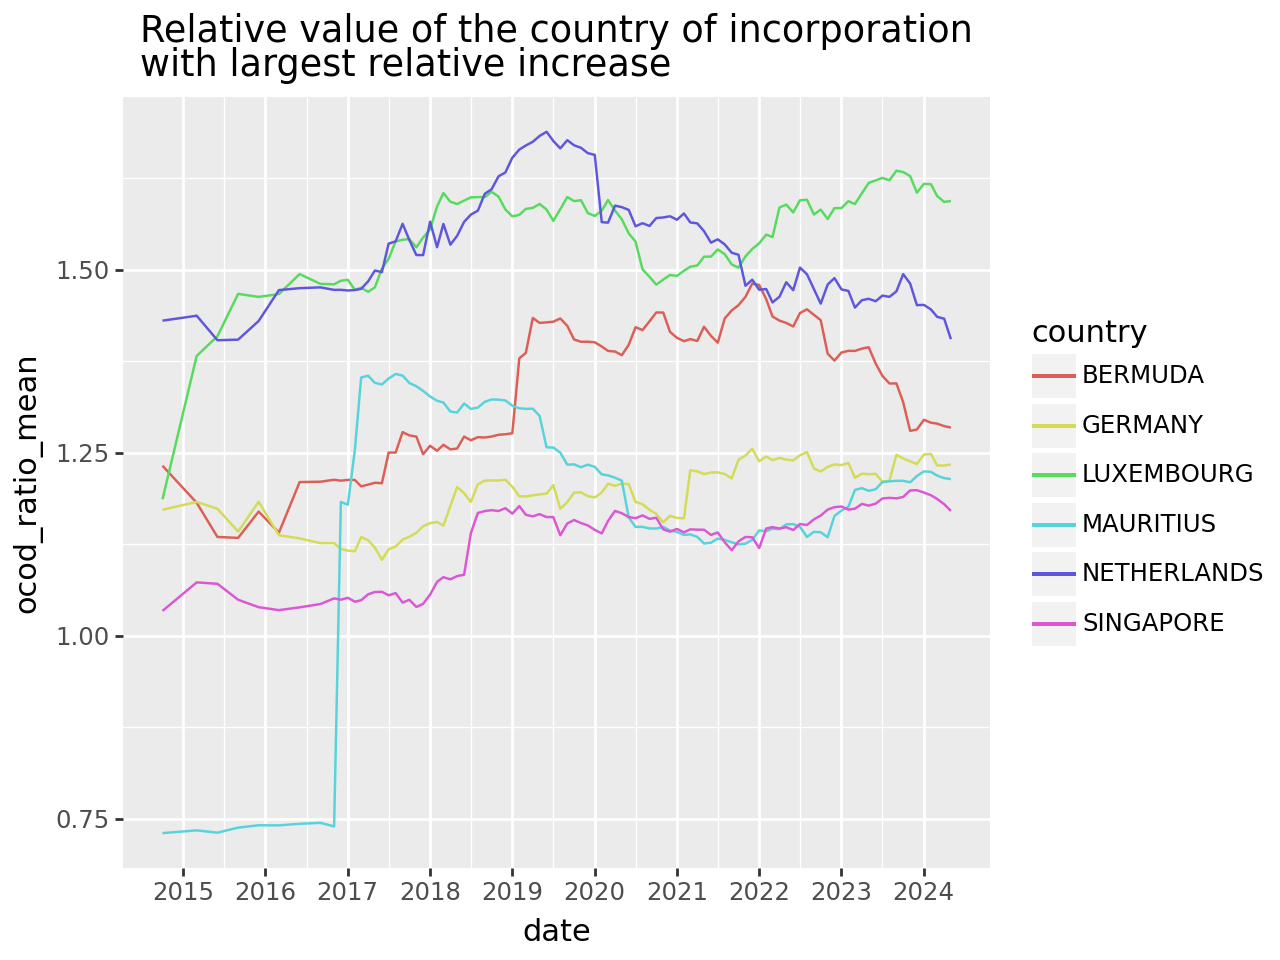

In [21]:
df_msoa_incorporated['country_incorporated'] = df_msoa_incorporated['country_incorporated'].str.replace("BRITISH VIRGIN ISLANDS", "BVI")

p = ggplot(df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin([ 'LUXEMBOURG', 'MAURITIUS', 
'SINGAPORE', 'GERMANY', 'BERMUDA', 'NETHERLANDS'])], 
aes(x = 'date', y = 'ocod_ratio_mean', color = 'country_incorporated')) + geom_line() + labs(
    title = "Relative value of the country of incorporation\nwith largest relative increase") +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_incorporated['date'].min(), end=df_msoa_incorporated['date'].max(), freq='YE'),
     date_labels='%Y'  # Format to show only year
 ) + \
  guides(color = guide_legend(title = "country")) 

p.save(filename = figures_folder / 'relative_value_incorporation_increases.png')

p

In [22]:
countries = [
    "JERSEY",
    "BVI",
    "GUERNSEY",
    "ISLE OF MAN",
    "GIBRALTAR",
    "LUXEMBOURG",
    "SINGAPORE",
    "IRELAND",
    "HONG KONG",
    "PANAMA",
    "CAYMAN ISLANDS",
    "SEYCHELLES",
    "NETHERLANDS",
    "CYPRUS",
    "BAHAMAS",
    "MAURITIUS",
    "GERMANY",
    "AUSTRALIA",
    "BERMUDA",
    "DELAWARE, U.S.A."
]

In [23]:
df = df_msoa_incorporated.loc[df_msoa_incorporated['country_incorporated'].isin(countries)]

# Get values at min and max dates
grouped = df.groupby('country_incorporated').apply(
    lambda x: pd.Series({
        'min_date_value': x.loc[x['date'].idxmin(), 'ocod_ratio_mean'],
        'max_date_value': x.loc[x['date'].idxmax(), 'ocod_ratio_mean']
    })
)

# Calculate ratio of change
grouped['ratio_change'] = grouped['max_date_value'] / grouped['min_date_value']
result = grouped['ratio_change']

result.sort_values().reset_index()

/tmp/ipykernel_703104/1438688812.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


,country_incorporated,ratio_change
0,AUSTRALIA,0.640416
1,BVI,0.768906
2,JERSEY,0.799452
3,CAYMAN ISLANDS,0.827457
4,GUERNSEY,0.845989
5,BAHAMAS,0.858812
6,SEYCHELLES,0.875898
7,PANAMA,0.908151
8,GIBRALTAR,0.916645
9,ISLE OF MAN,0.918069


In [24]:

df_msoa_region_nested = create_time_series_by_groups(  msoa_dwellings = msoa_dwelling, grouping_vars = ['region', 'is_multi'], 
ocod_path = active_ocod_path,
class_var = active_class_var)

100%|██████████| 99/99 [00:38<00:00,  2.59it/s]


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: ../figures/figures_new/relative_value_nested_region.png


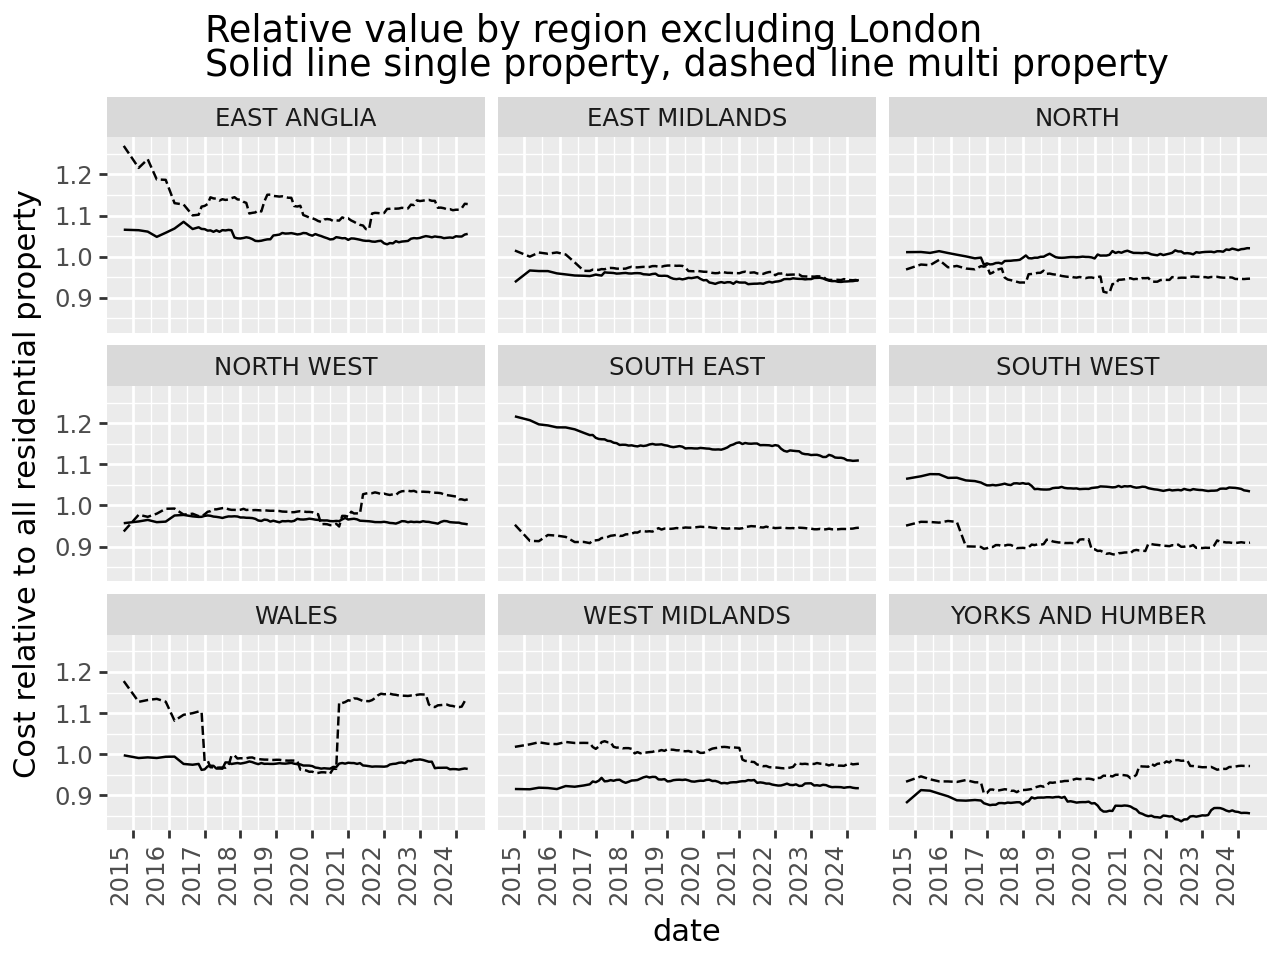

In [25]:
p = ggplot(df_msoa_region_nested.loc[df_msoa_region_nested['region']!='GREATER LONDON'], 
aes(x = 'date', y = 'ocod_ratio_mean', linetype = 'is_multi')) + geom_line() + labs(
    title = "Relative value by region excluding London\nSolid line single property, dashed line multi property",
    linetype = 'nested',
    y = 'Cost relative to all residential property') +   scale_x_date(
     breaks=pd.date_range(start=df_msoa_region_nested['date'].min(), end=df_msoa_region_nested['date'].max(), freq='YE'),
     date_labels='%Y'
 ) + facet_wrap("region") +\
    theme(
        axis_text_x=element_text(angle=90,hjust = 1),
        legend_position = 'none'
    )


p.save(filename = figures_folder / 'relative_value_nested_region.png')

p

In [26]:
df_msoa_lad = create_time_series_by_groups(msoa_dwellings = msoa_dwelling, grouping_vars = ['lad11cd'], 
ocod_path = active_ocod_path,
class_var = active_class_var )


100%|██████████| 99/99 [01:01<00:00,  1.61it/s]


In [27]:
df_msoa_lad

,date,year,month,ocod_mean,ocod_median,dwelling_mean,dwelling_median,ocod_ratio_mean,ocod_total_counts,total_dwelling_count,total_value_ocod_mean,total_value_dwelling_mean,fraction_of_total_value,lad11cd
0,2015-10-01,2015,10,90829,80702,100596,91212,0.902913,17,19954,1544107,2007302380,0.000769,E06000001
1,2015-10-01,2015,10,96892,85988,107370,96055,0.902409,38,31874,3681915,3422341331,0.001076,E06000002
2,2015-10-01,2015,10,116280,107316,121075,113344,0.960401,14,25985,1627927,3146134467,0.000517,E06000003
3,2015-10-01,2015,10,145502,135495,140303,127474,1.037055,93,46802,13531738,6566491665,0.002061,E06000004
4,2015-10-01,2015,10,141408,130500,126958,117242,1.113817,16,22680,2262531,2879410931,0.000786,E06000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31414,2025-05-01,2025,5,271901,247692,284665,264464,0.955163,13,6272,3534724,1785421339,0.001980,W06000020
31415,2025-05-01,2025,5,369204,346462,385099,357737,0.958727,14,15308,5168868,5895098913,0.000877,W06000021
31416,2025-05-01,2025,5,240241,227957,226374,213283,1.061258,47,38663,11291355,8752309370,0.001290,W06000022
31417,2025-05-01,2025,5,284897,258281,268029,240387,1.062932,8,22385,2279179,5999846666,0.000380,W06000023


In [28]:
df_msoa_lad['fraction'] = df_msoa_lad.groupby('date')['total_value_ocod_mean'].transform(lambda x: x / x.sum())

In [29]:
df_msoa_lad.groupby('lad11cd')[['fraction', 'total_value_ocod_mean']].mean().sort_values('fraction').sort_values('fraction',ascending = False)

,fraction,total_value_ocod_mean
lad11cd,,
E09000033,0.315983,1.962378e+10
E09000020,0.178826,1.106468e+10
E09000013,0.040868,2.533984e+09
E09000032,0.038080,2.384223e+09
E09000007,0.036873,2.293180e+09
...,...,...
E07000172,0.000015,8.916799e+05
E06000012,0.000014,9.122549e+05
E07000175,0.000014,8.869755e+05


In [30]:
df_msoa_lad.to_csv('../data/lad.csv')